
<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;">
    <h1 style='margin:15px 15px; color:#4B0082; font-size:40px'>Hierarchical clustering</h1>
    <h1 style='margin:15px 15px; color:#000; font-size:15px'>Réalisé par : AKHADAM Ayoub</h1>
   
</div>
    
    

    
    03/12/2021
    

In [1]:
options(warn=0)

## Jeu de données

L'ensemble de données contient les résultats de deux compétitions d'athlétisme. Les Jeux olympiques d'Athènes 2004 et le Décastar 2004.

Le jeu  de données contient 41 lignes (41 Athlètes) et 13 colonnes : 
- les dix premières colonnes sont des variables quantitatives correspondent aux performances des athlètes pour les 10 épreuves du décathlon. 
- Les colonnes 11 et 12 correspondent respectivement au rang et aux points obtenus.
- La dernière colonne est une variable qualitative correspondant à la compétition (Jeux Olympiques 2004 ou Décastar 2004).


In [66]:
decathlon.data <- read.table("decathlon.csv", header=TRUE, sep=";",dec=".", row.names=1, check.names=FALSE)
head(decathlon.data)

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,JO
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,JO
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54,6,8287,JO


In [3]:
summary(decathlon.data)

      100m          Longueur        Poids          Hauteur           400m      
 Min.   :10.44   Min.   :6.61   Min.   :12.68   Min.   :1.850   Min.   :46.81  
 1st Qu.:10.85   1st Qu.:7.03   1st Qu.:13.88   1st Qu.:1.920   1st Qu.:48.93  
 Median :10.98   Median :7.30   Median :14.57   Median :1.950   Median :49.40  
 Mean   :11.00   Mean   :7.26   Mean   :14.48   Mean   :1.977   Mean   :49.62  
 3rd Qu.:11.14   3rd Qu.:7.48   3rd Qu.:14.97   3rd Qu.:2.040   3rd Qu.:50.30  
 Max.   :11.64   Max.   :7.96   Max.   :16.36   Max.   :2.150   Max.   :53.20  
     110m H          Disque          Perche         Javelot     
 Min.   :13.97   Min.   :37.92   Min.   :4.200   Min.   :50.31  
 1st Qu.:14.21   1st Qu.:41.90   1st Qu.:4.500   1st Qu.:55.27  
 Median :14.48   Median :44.41   Median :4.800   Median :58.36  
 Mean   :14.61   Mean   :44.33   Mean   :4.762   Mean   :58.32  
 3rd Qu.:14.98   3rd Qu.:46.07   3rd Qu.:4.920   3rd Qu.:60.89  
 Max.   :15.67   Max.   :51.65   Max.   :5.400   M

In [45]:
library(FactoMineR)
library(factoextra)

## HCPC - Hierarchical Clustering on Principal Components

## ACP
On utilise les cordonnées des individus de l'ACP pour réaliser la classification hiérarchique.

On réalise la classification à partir des 10 premières variables.

On ajoute les variables classement et points comme des variables quantitatives supplémentaires et la variable Compétition comme variable qualitative supplémentaire.

In [46]:
res <- PCA(decathlon.data, quanti.sup=11:12, quali.sup=13)
summary(res)


Call:
PCA(X = decathlon.data, quanti.sup = 11:12, quali.sup = 13) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               3.272   1.737   1.405   1.057   0.685   0.599   0.451
% of var.             32.719  17.371  14.049  10.569   6.848   5.993   4.512
Cumulative % of var.  32.719  50.090  64.140  74.708  81.556  87.548  92.061
                       Dim.8   Dim.9  Dim.10
Variance               0.397   0.215   0.182
% of var.              3.969   2.148   1.822
Cumulative % of var.  96.030  98.178 100.000

Individuals (the 10 first)
               Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
Sebrle     |  4.843 |  4.038 12.158  0.695 |  1.366  2.619  0.080 | -0.290
Clay       |  4.647 |  3.919 11.451  0.711 |  0.837  0.984  0.032 |  0.231
Karpov     |  5.006 |  4.620 15.911  0.852 |  0.040  0.002  0.000 | -0.042
Macey      |  3.434 |  2.233  3.719  0.423 |  1.042  1.524  0.092 | -1.864
Warners    |  2.979 |  2.16

####  Visualisation des individus

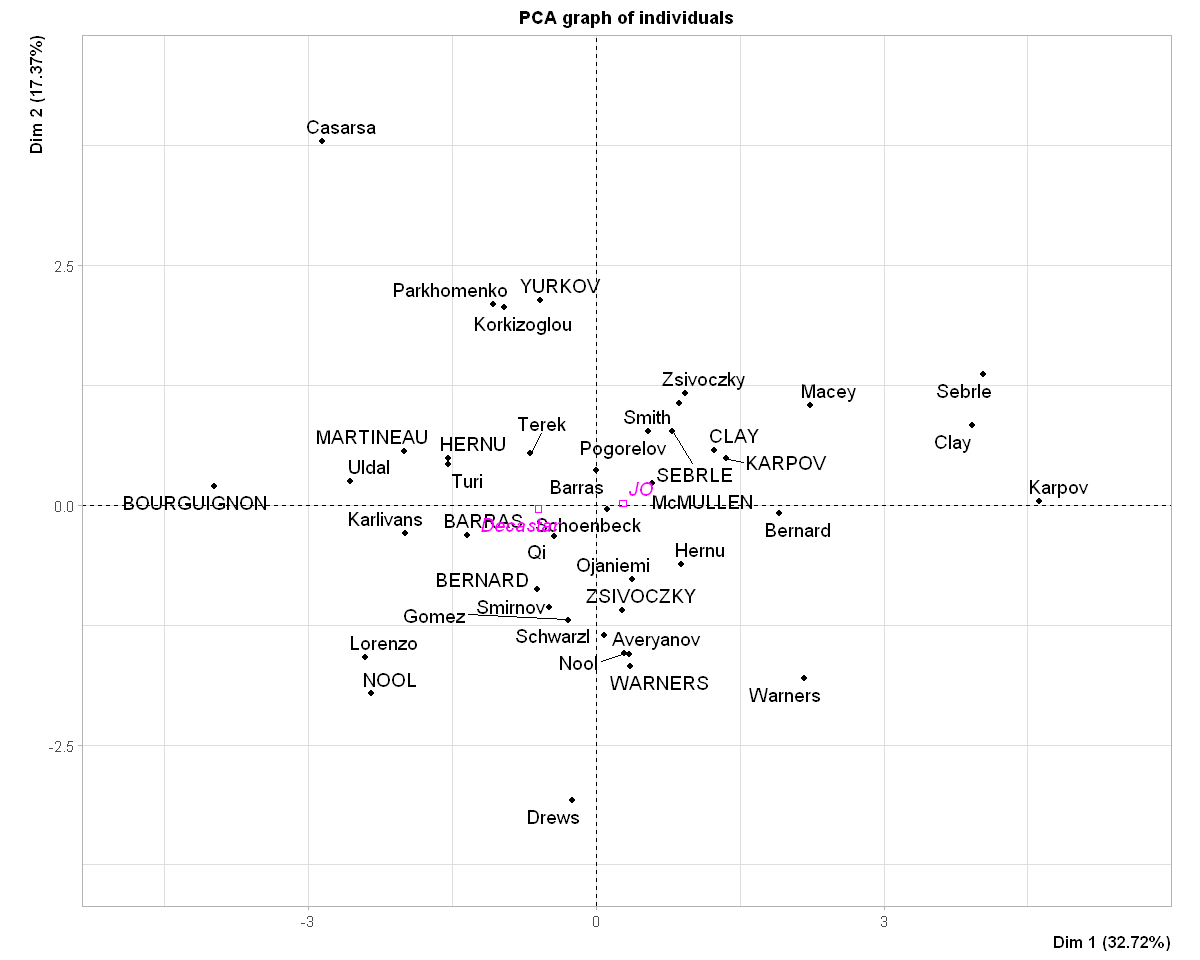

In [15]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot.PCA(res)

#### Dendrogramme de la classification des athlètes

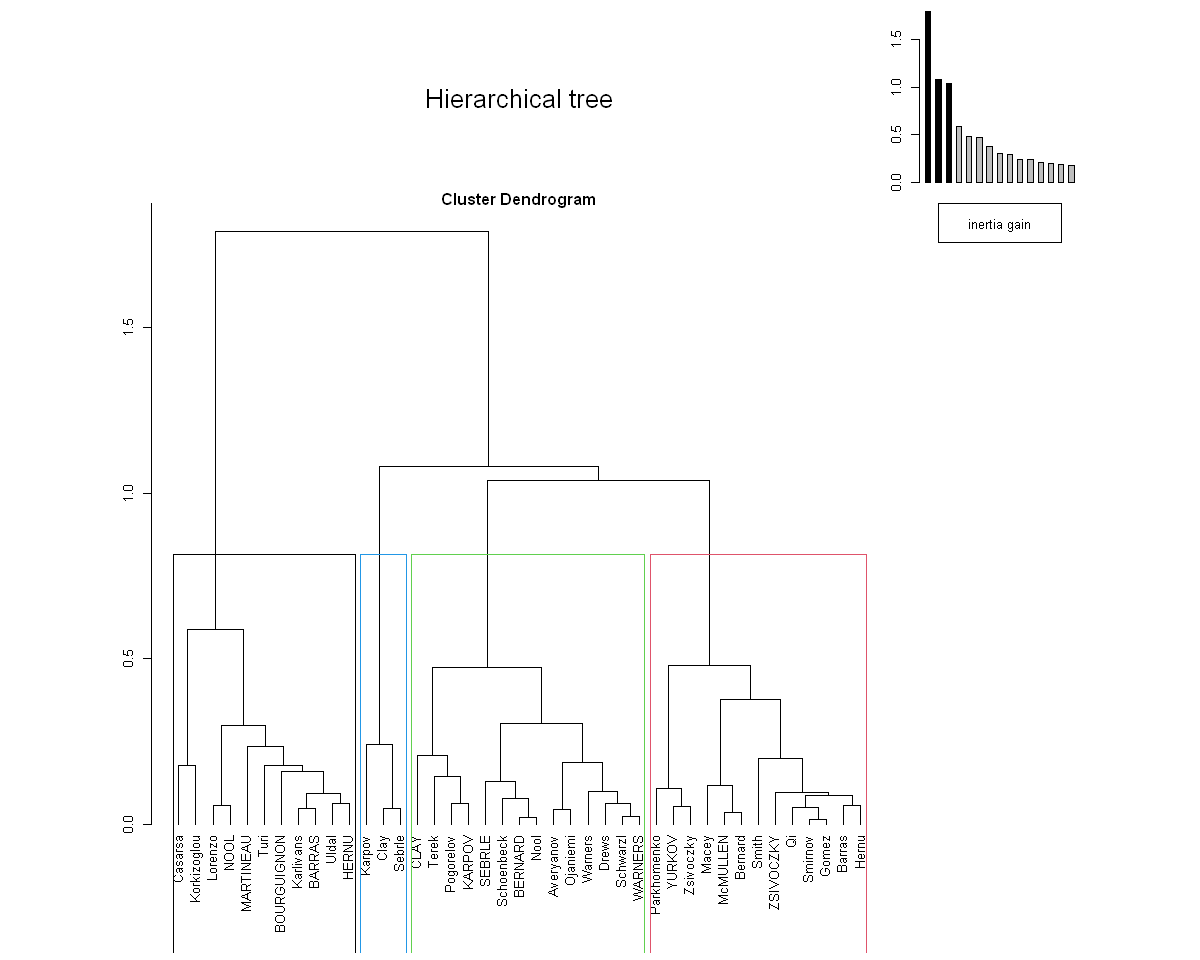

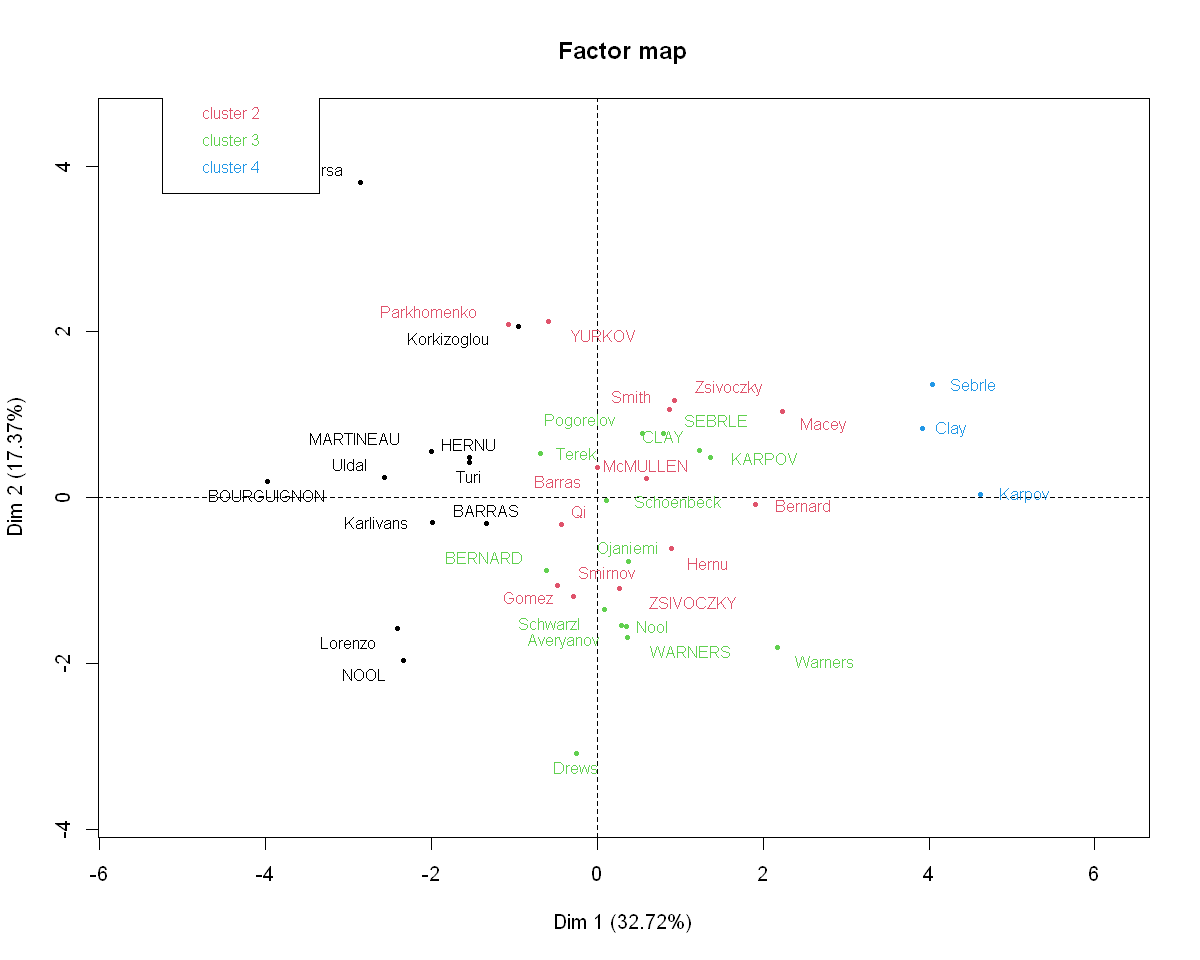

In [16]:
res.PCA<-PCA(decathlon.data,ncp=8,quali.sup=c(13),quanti.sup=c(11,12),graph=FALSE)
res.HCPC<-HCPC(res.PCA,nb.clust=4,consol=FALSE,graph=FALSE)
plot.HCPC(res.HCPC,choice='tree',title='Hierarchical tree')
plot.HCPC(res.HCPC,choice='map',draw.tree=FALSE,title='Factor map')

### Intérpretation

La classification réalisée sur les individus fait apparaître 4 classes.

- Si on prend par exemple La classe 1 qu'est composée d’individus tels que MARTINEAU, NOOL, BOURGUIGNON, Lorenzo, Karlivans, Korkizoglou, Uldal et Casarsa. On remarque que ce groupe est caractérisé par :

    - de fortes valeurs pour les variables 100m, 400m, 110m.H et Rank.
    - de faibles valeurs pour les variables Points, poids, Longueur et hauteur jump.


In [42]:
decathlon.data[c('Nool','Clay', 'BOURGUIGNON','Lorenzo','Uldal','Casarsa'),]

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,JO
BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,13,7313,Decastar
Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.50,58.36,263.08,24,7592,JO
Uldal,11.23,6.99,13.53,1.85,50.95,15.09,43.01,4.50,60.00,281.70,27,7495,JO
Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.40,58.62,296.12,28,7404,JO


- La classe 4 est composée d’individus tels que Sebrle, Clay et Karpov. Ce groupe est caractérisé par :
    - de fortes valeurs pour les variables Points, Longueur, Disque, poids, Javelot et hauteur.
    - de faibles valeurs pour les variables 100m, 400m, Rank et 110m.h

In [43]:
decathlon.data[c('Sebrle','Clay', 'Karpov'),]

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,JO
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,JO
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,JO


## CAH - Classification Ascendante Hiérarchique

### Matrice des distances

In [58]:
data <- decathlon.data[,1:10]

In [59]:
d <- dist(data, method = "euclidean")
d

               Sebrle      Clay    Karpov     Macey   Warners Zsivoczky
Clay         2.952389                                                  
Karpov      15.474928 14.986314                                        
Macey       18.973260 20.143877 13.633914                              
Warners     16.169171 16.233407  8.144071 13.909964                    
Zsivoczky   13.145094 14.705751 13.455657  7.070113 12.044908          
Hernu       20.679439 22.018724 15.758902  4.039629 13.978187  7.843526
Nool        12.164645 13.017988 11.712506 13.044455  6.540420  8.094955
Bernard     16.296303 16.442503  7.603164 11.947380  2.429197 10.709697
Schwarzl    17.044380 17.660767 10.926660 10.487540  5.141070  8.933241
Pogorelov   19.345188 18.158208 12.724044 23.164648 10.246248 20.759008
Schoenbeck  10.929620 11.071233  9.789331 14.286728  6.100598  9.786884
Barras      14.899859 16.689991 16.068534  7.312742 14.441229  2.907043
Smith       11.737632 12.491429  8.908333  8.035907  9.870973  5

In [60]:
library(purrr)
library(cluster)

In [61]:
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

ac <- function(x) {
  agnes(data, method = x)$ac
}

print(map_dbl(m, ac))

  average    single  complete      ward 
0.8618245 0.7344465 0.8994446 0.9378897 


La méthode de Ward identifie la structure de clustering la plus forte par rapport aux quatre méthodes.

In [62]:
hc <- hclust(d, method = "ward.D")
hc


Call:
hclust(d = d, method = "ward.D")

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 41 


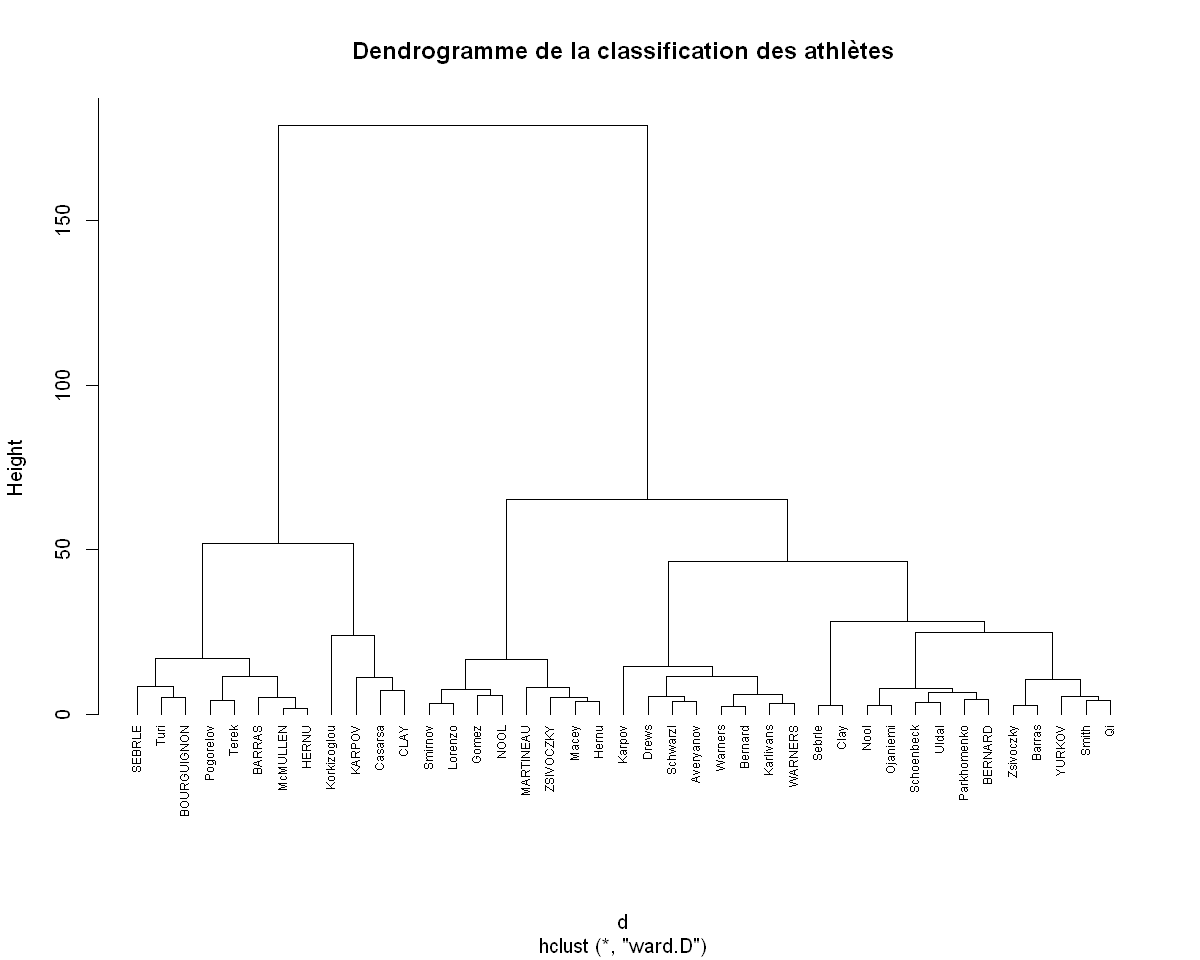

In [63]:
plot(hc, cex = 0.6, hang = -1,, main = "Dendrogramme de la classification des athlètes")

### Qualité des partitions

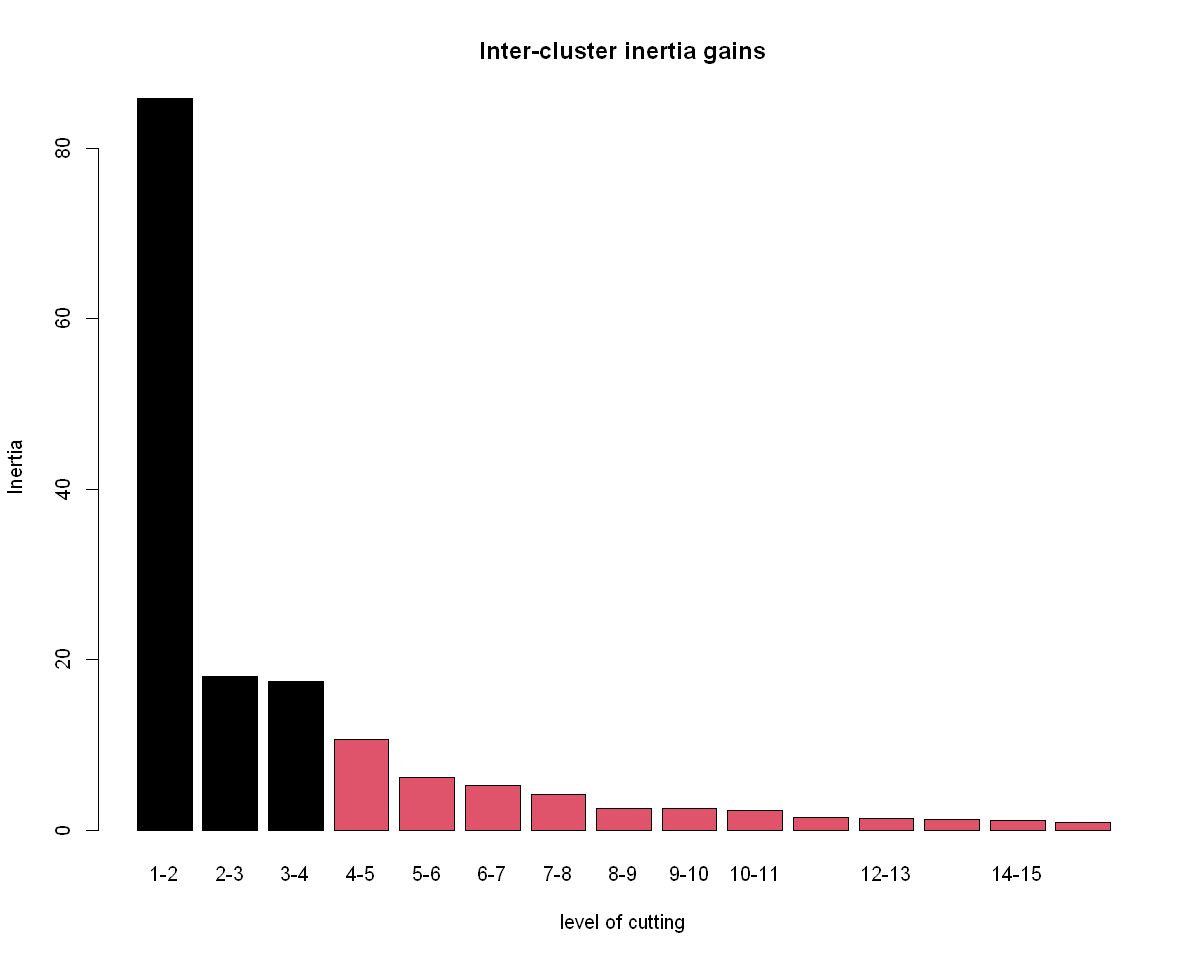

In [64]:
cah <- HCPC(data, nb.clust=-1, graph=F)
plot(cah, choice='bar')

On remarque que le découpage en 5 groupes garde un pourcentage important d'informations.

### Découpage

In [65]:
groupes.cah <- cutree(hc, k=5)
print(sort(groupes.cah))

     Sebrle        Clay   Zsivoczky        Nool  Schoenbeck      Barras 
          1           1           1           1           1           1 
      Smith    Ojaniemi          Qi Parkhomenko       Uldal     BERNARD 
          1           1           1           1           1           1 
     YURKOV      Karpov     Warners     Bernard    Schwarzl   Averyanov 
          1           2           2           2           2           2 
      Drews   Karlivans     WARNERS       Macey       Hernu     Smirnov 
          2           2           2           3           3           3 
      Gomez     Lorenzo   ZSIVOCZKY   MARTINEAU        NOOL   Pogorelov 
          3           3           3           3           3           4 
      Terek        Turi      SEBRLE    McMULLEN       HERNU      BARRAS 
          4           4           4           4           4           4 
BOURGUIGNON Korkizoglou     Casarsa        CLAY      KARPOV 
          4           5           5           5           5 
